## Download: GPM IMERG Final Precipitation L3 1 month 0.1 degree x 0.1 degree V07 (GPM_3IMERGM)

1. Create an Earthdata account
2. Link <a href="https://disc.gsfc.nasa.gov/earthdata-login">GES DISC</a> with your account.
3. Verify by downloading this example data file URL
    Download the list of links
4. Follow the instructions for <a href="https://disc.gsfc.nasa.gov/information/documents?title=Data%20Access#windows_wget">wget</a>

    4.1 Generate Earthdata prerequisite files (.netrc, .dodsrc, .urs_cookies) y following this <a href="https://disc.gsfc.nasa.gov/information/howto?title=How%20to%20Generate%20Earthdata%20Prerequisite%20Files">how to</a>.

In [ ]:
# Create .netrc, .dodsrc, .urs_cookies files

from subprocess import Popen
from getpass import getpass
import platform
import os
import shutil

urs = 'urs.earthdata.nasa.gov'    # Earthdata URL to call for authentication
prompts = ['Enter NASA Earthdata Login Username \n(or create an account at urs.earthdata.nasa.gov): ',
           'Enter NASA Earthdata Login Password: ']

homeDir = os.path.expanduser("~") + os.sep

with open(homeDir + '.netrc', 'w') as file:
    file.write('machine {} login {} password {}'.format(urs, getpass(prompt=prompts[0]), getpass(prompt=prompts[1])))
    file.close()
with open(homeDir + '.urs_cookies', 'w') as file:
    file.write('')
    file.close()
with open(homeDir + '.dodsrc', 'w') as file:
    file.write('HTTP.COOKIEJAR={}.urs_cookies\n'.format(homeDir))
    file.write('HTTP.NETRC={}.netrc'.format(homeDir))
    file.close()

print('Saved .netrc, .urs_cookies, and .dodsrc to:', homeDir)

# Set appropriate permissions for Linux/macOS
if platform.system() != "Windows":
    Popen('chmod og-rw ~/.netrc', shell=True)
else:
    # Copy dodsrc to working directory in Windows  
    shutil.copy2(homeDir + '.dodsrc', os.getcwd())
    print('Copied .dodsrc to:', os.getcwd())

### 5. Download data

In [20]:
# Download data with request
import requests

# Set the URL string to point to a specific data URL. Some generic examples are:
#   https://data.gesdisc.earthdata.nasa.gov/data/MERRA2/path/to/granule.nc4

URL = 'https://gpm1.gesdisc.eosdis.nasa.gov/opendap/GPM_L3/GPM_3IMERGM.07/2023/3B-MO.MS.MRG.3IMERG.20230801-S000000-E235959.08.V07B.HDF5.nc4?precipitation[0:0][1080:1240][659:819],time,lon[1080:1240],lat[659:819]'
# Set the FILENAME string to the data file name, the LABEL keyword value, or any customized name. 
FILENAME = 'Bolivia_data_20230801-20230831.nc'

import requests
result = requests.get(URL)
try:
    result.raise_for_status()
    f = open(FILENAME,'wb')
    f.write(result.content)
    f.close()
    print('contents of URL written to '+FILENAME)
except:
    print('requests.get() returned an error code '+str(result.status_code))

contents of URL written to Bolivia_data_20230801-20230831.nc


In [32]:
path_file = r"D:\CURSOS\08_GPM_precipitation\01_Assignment\Bolivia_data_20230801-20230831.nc"

ds_mei = xr.open_mfdataset(path_file, chunks={'time': 120}, combine='nested', concat_dim='time')
ds_mei

<xarray.Dataset>
Dimensions:        (time: 1, lon: 161, lat: 161)
Coordinates:
  * lat            (lat) float32 -24.05 -23.95 -23.85 ... -8.25 -8.15 -8.05
  * lon            (lon) float32 -71.95 -71.85 -71.75 ... -56.15 -56.05 -55.95
  * time           (time) object 2023-08-01 00:00:00
Data variables:
    precipitation  (time, lon, lat) float32 dask.array<chunksize=(1, 161, 161), meta=np.ndarray>
Attributes:
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-MONTH/07;\nDOIa...
    FileInfo:                        DataFormatVersion=7e;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  time
    history:                         2024-03-19 18:50:41 GMT Hyrax-1.16.3 htt...

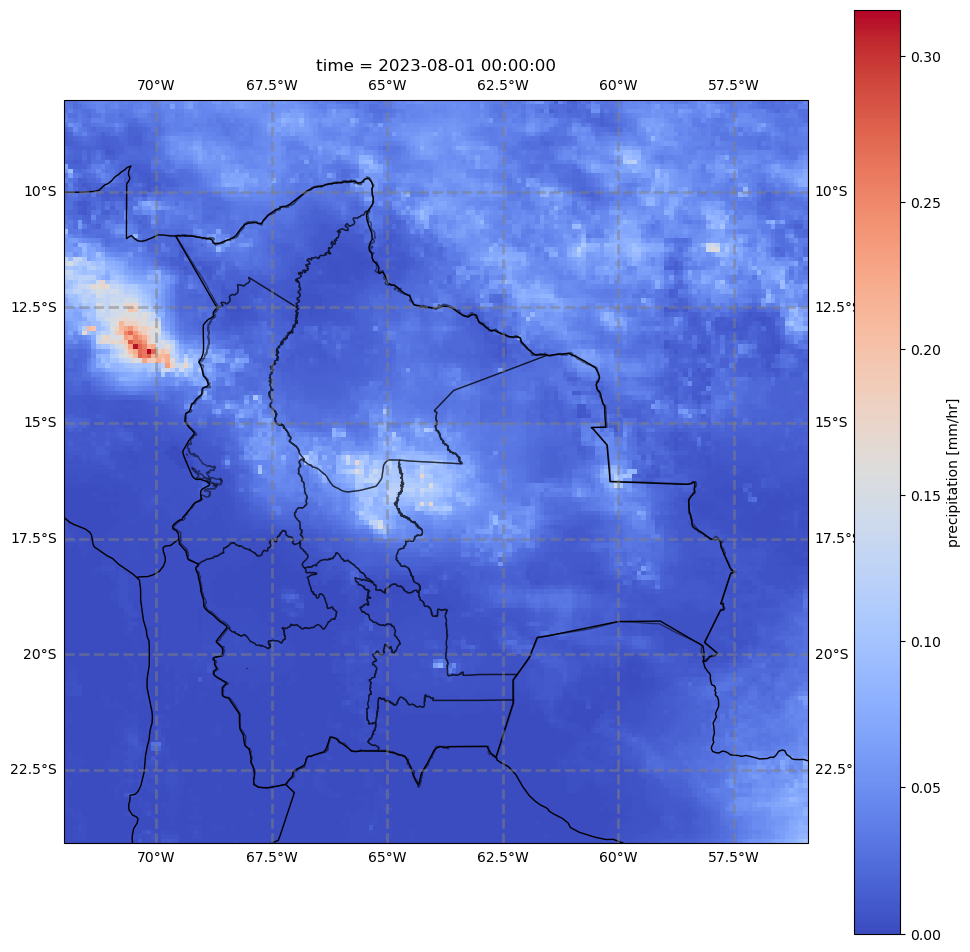

In [38]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import cftime
fig = plt.figure(1, figsize=[12,12])

fname = r"D:\LHUMSS\LHUMSS_2023\Previo_OfertaHidrica\08_Anexos_Digitales - Copy\2_Archivos_GIS\2.3_Otros\limites_departamentales.shp"
adm1_shapes = list(shpreader.Reader(fname).geometries())

# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cf.BORDERS)

ds_mei['precipitation'].isel(time=0).plot.pcolormesh(ax=ax, x="lon", y="lat",cmap='coolwarm')

ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', facecolor='None', alpha=0.5)

ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
